Load necessary packages


In [1]:
#Libraries for Data cleaning and Data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for Data preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#Machine learning
from sklearn.ensemble import RandomForestClassifier

#Libraries for machine learning Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# load the data
data=pd.read_csv("Markrting campaign 2.csv")

In [5]:
# show information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [6]:
# show all null values
data.isnull().sum()*100/len(data)

id                               0.000000
target                           0.000000
day                              0.000000
month                            0.000000
duration                         0.000000
contactId                        0.000000
age                              0.000000
gender                           0.000000
job                              0.000000
maritalStatus                    0.000000
education                        0.000000
creditFailure                    0.000000
accountBalance                   0.000000
house                            0.000000
credit                           0.000000
contactType                      0.000000
numberOfContacts                 0.000000
daySinceLastCampaign            81.772554
numberOfContactsLastCampaign     0.000000
lastCampaignResult               0.000000
dtype: float64

In [8]:
#Replace unknown with null values
data.replace("unknown",pd.np.nan,inplace=True)

C:\Users\PEFRIC (E.A) LTD\AppData\Local\Temp\ipykernel_12284\2738998588.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.replace("unknown",pd.np.nan,inplace=True)


In [10]:
data.isnull().sum()

id                                  0
target                              0
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                               212
maritalStatus                       0
education                        1300
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                      9079
numberOfContacts                    0
daySinceLastCampaign            25742
numberOfContactsLastCampaign        0
lastCampaignResult              25746
dtype: int64

In [12]:
#Dataset shape
data.shape

(31480, 20)

In [13]:
#Replace month names with month numbers
month_map = {
      "jan": "01",
      "feb": "02",
      "mar": "03",
      "apr": "04",
      "may": "05",
      "jun": "06",
      "jul": "07",
      "aug": "08",
      "sep": "09",
      "oct": "10",
      "nov": "11",
      "dec": "12"}

# Replace month names in the dfFrame with month numbers
data["month"]=data["month"].replace(month_map)
data

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,05,166,623,30,female,worker,married,highSchool,no,-202,no,no,NaN,2,NaN,0,NaN
1,432184318,no,26,10,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,NaN
2,432182482,no,5,06,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,NaN
3,432150520,no,2,06,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,NaN,3,NaN,0,NaN
4,432145870,no,15,05,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,NaN,2,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31475,432184725,yes,30,11,1628,69542367,58,female,technical,married,highSchool,no,3399,no,no,landline,2,188.0,8,success
31476,432147139,no,21,05,173,69542565,40,female,manager,single,secondarySchool,no,858,yes,no,NaN,1,NaN,0,NaN
31477,432166958,no,17,11,422,69543453,51,female,worker,married,highSchool,no,1414,yes,no,NaN,3,186.0,2,failure
31478,432166312,no,29,08,69,69544121,30,male,technical,married,uniGraduated,no,1,no,no,cellPhone,21,NaN,0,NaN


Calculate describe statistics (count , max , min , 50%,25% ,75% , mean)
Creates a new variable called df_describe and Remove contactId, id because is not important

The second line of code, df_describe.describe(), prints the summary statistics of the df_describe DataFrame. The describe() method calculates the mean, standard deviation, minimum, maximum, and quartiles of the DataFrame.

#What is the difference between the number of males and females compared to the acceptance or rejection of the marketing campaign?

<Axes: title={'center': 'Count Gender by Target'}, xlabel='gender', ylabel='count'>

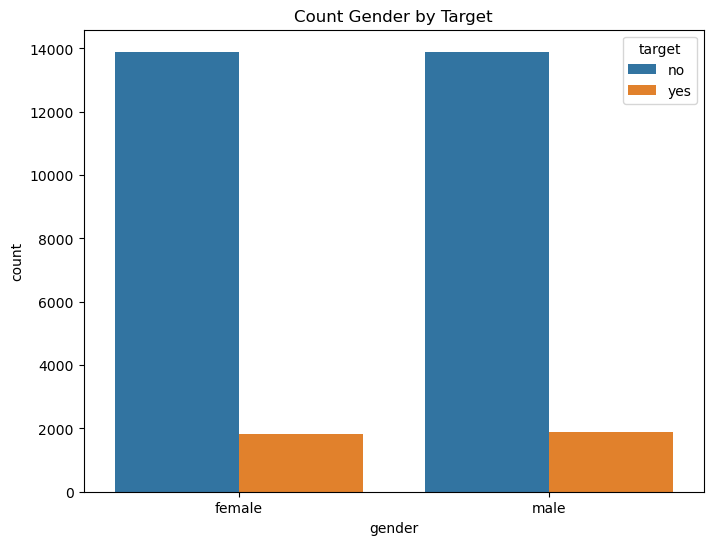

In [19]:
# size figure
data=data.copy()
fig, ax=plt.subplots(figsize=(8,6))
ax.set_title("Count Gender by Target")
# Countplot
sns.countplot(x='gender',data=data,hue="target",ax=ax)

We note that the number of males and females is almost equal, but the number of those who reject the marketing campaign is very large in proportion to those who agree with the marketing campaign.

#What is the relationship between age and contract duration ?

<Axes: title={'center': 'Relationship between age and duration'}, xlabel='age', ylabel='duration'>

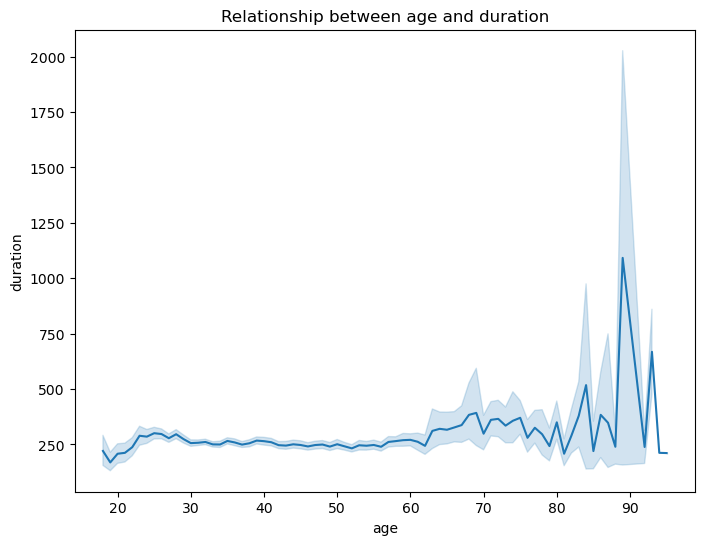

In [21]:
fig, ax=plt.subplots(figsize=(8,6))
data=data.copy()
ax.set_title("Relationship between age and duration")
sns.lineplot(x='age',y='duration',data=data,ax=ax)

We notice that the duration of the conversation increases from the age of 80 to 90 compared to younger people.

#Boxplot that shows the distribution of the age variable for each target value

<Axes: title={'center': 'Distribution of the age by target'}, xlabel='age', ylabel='target'>

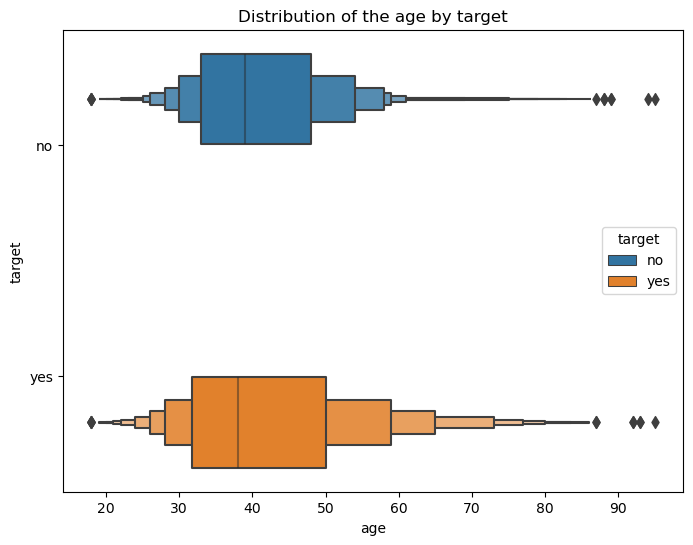

In [23]:
fig, ax=plt.subplots(figsize=(8,6))
data=data.copy()
ax.set_title("Distribution of the age by target")
sns.boxenplot(x="age",y="target",hue="target",data=data,ax=ax)

We note the boxplot that shows the distribution of the age variable for each target value shows the minimum, 25th percentile, median, 75th percentile, and maximum values for the age variable for each target value. The boxes will be colored differently for each target value.

#What are the Types of Educations ?

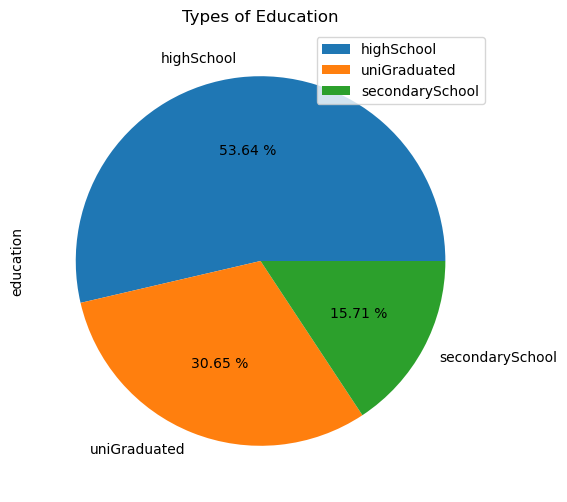

In [26]:
# Create a df frame of education counts
data.copy()
education_counts = data['education'].value_counts()

# Plot a pie chart
education_counts.plot(kind='pie', title='Types of Education',autopct='%.2f %%', figsize=(8,6))

plt.legend()
plt.show()

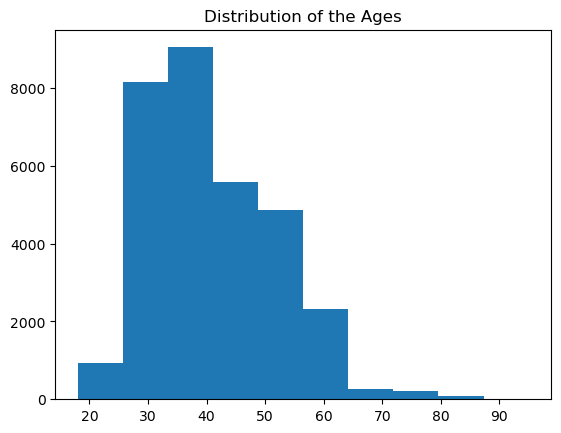

In [29]:
#What are the Distribution Ages?
data.copy()
plt.hist(data.age)
plt.title("Distribution of the Ages")
plt.show()


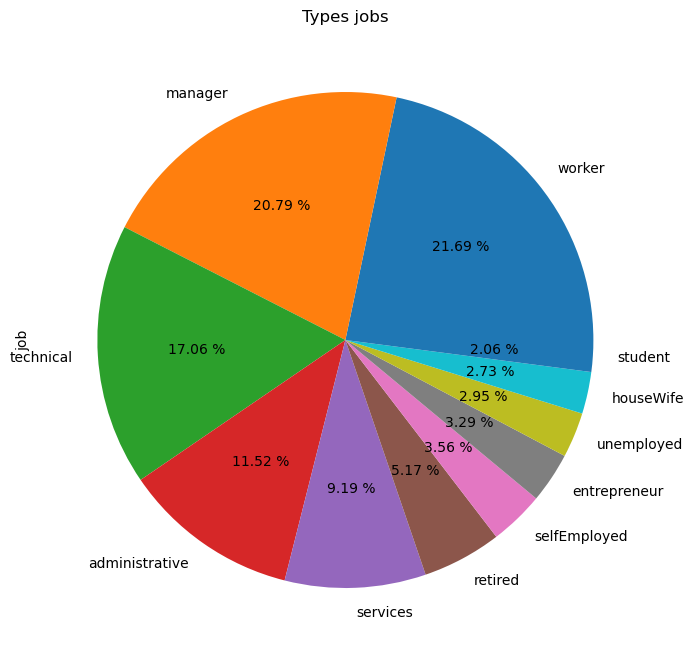

In [31]:
#What are the Types of jobs?

data.copy()
job_counts = data['job'].value_counts()
job_counts.plot(kind='pie', title='Types jobs',autopct='%.2f %%', figsize=(8,10))
plt.show()

#What is the relationship between marital status and account balance ?

<Axes: title={'center': 'Marital Status vs Account Balance'}, xlabel='maritalStatus', ylabel='accountBalance'>

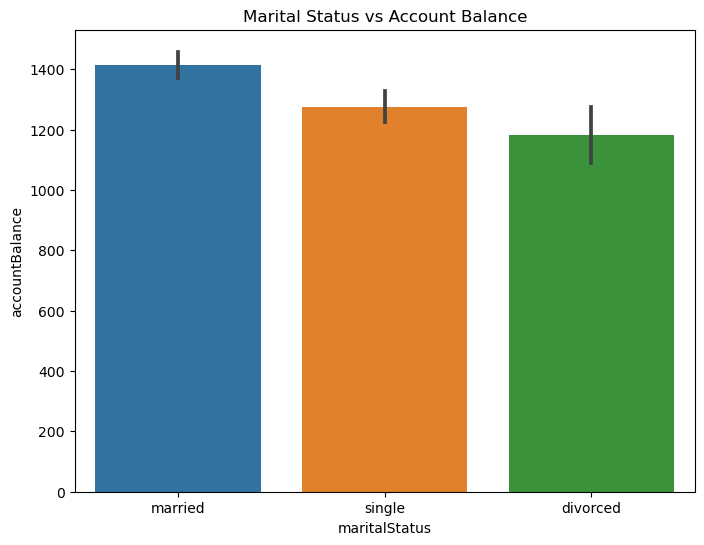

In [33]:
data=data.copy()
fig, ax=plt.subplots(figsize=(8,6))
ax.set_title("Marital Status vs Account Balance")
sns.barplot(x="maritalStatus",y="accountBalance",data=data,ax=ax)

In [36]:
#Who is the person who has the highest account balance?
ga=data[(data.gender==data.gender)&(data.accountBalance==data.accountBalance.max())]
ga

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
25480,432168574,no,20,11,145,56135495,59,female,manager,married,uniGraduated,no,98417,no,no,landline,5,NaN,0,NaN


In [37]:
#How many customers have jobs but have no credits responded to the marketing campaign?
job=data[(data.job==data.job)&(data.credit=="no")]
print("Number of Customers :",job.count().sum())

Number of Customers : 473966


#How many customers have jobs and credits responded to the marketing campaign?


In [39]:
job=data[(data.job==data.job)&(data.credit=="yes")]
print("Number of Customers :",job.count().sum())

Number of Customers : 90058


<Axes: title={'center': 'What best types of contact '}, xlabel='contactType', ylabel='count'>

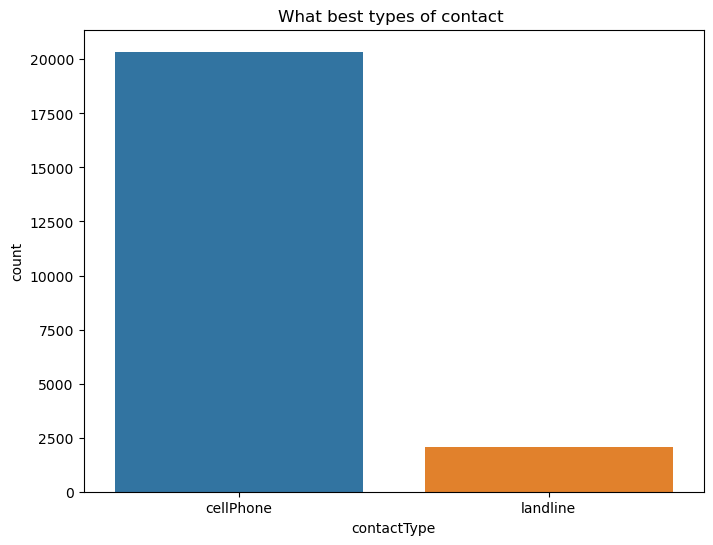

In [40]:
#What best types of contact ?
data=data.copy()
fig, ax=plt.subplots(figsize=(8,6)) # size figure
ax.set_title("What best types of contact ")
sns.countplot(x='contactType',data=data)

Prediction model

Feature Enginering

Calculate the percentage of nulls values

In [42]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),'% missing values')


job 0.0067 % missing values
education 0.0413 % missing values
contactType 0.2884 % missing values
daySinceLastCampaign 0.8177 % missing values
lastCampaignResult 0.8179 % missing values


We note that the percentage of null data is daySinceLastCampaign 0.8175% missing values lastCampaignResult 0.8176% missing values We drop these columns due to the high percentage of null values and Remove contactId, id because is not important

In [44]:
#Select all data except daySinceLast Campaign, lastCampaignResult, Id, and contactId
data.copy()
data=data.drop(["daySinceLastCampaign","lastCampaignResult","id","contactId"], axis=1)

In [45]:
#Now we replace yes to 1 and no to 0 in target
target_new = {"target": {"yes": 1, "no": 0}}
data.replace(target_new, inplace=True)


In [46]:
#Change Categorical Feature to Numerical Feature and merge columns
#select all Categorical Features
cat=data.select_dtypes(include=["object"])
#import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
Cat=enc.fit_transform(cat)
cat=pd.DataFrame(Cat,columns=cat.columns)
#select all Numerical Features
num=data.select_dtypes(exclude=["object"])
#marge Categorical Feature and Numerical Feature
data1=pd.concat([num,cat], axis="columns")
#replace null values to mean values
data1.fillna(data1.mean(),inplace=True)

mbalanced data


Imbalanced data In simple terms, an unbalanced dataset is one in which the target variable has more observations in one specific class than the others.

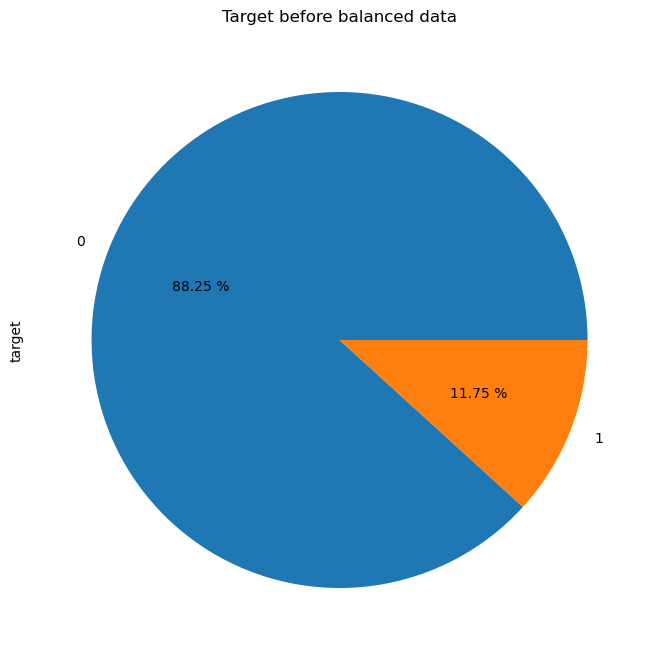

In [49]:
#now create a pie chart to select whether data is balanced or not
job_counts = data['target'].value_counts()
job_counts.plot(kind='pie', title='Target before balanced data',autopct='%.2f %%', figsize=(8,10))
plt.show()

Data is Imbalanced We use a technique called Random Over Sampling (ROS) is a technique used to address the problem of imbalanced datasets in machine learning. Imbalanced datasets occur when one class (the majority class) has significantly more samples than another class (the minority class). This can lead to machine learning models that are biased towards the majority class and perform poorly on the minority class.

ROS works by randomly duplicating samples from the minority class, with replacements, until the desired class balance is achieved. This means that some samples from the minority class may be duplicated multiple times, while others may not be duplicated at all.

First, we will divide the data into two categories: features and target, create X and y, and transform it into an array for ease of dealing with machine learning,x is all values except target and y is a target

In [50]:
X=np.array(data1.drop(['target'], axis=1))
y=np.array(data1["target"])

After knowing the data is imbalanced we use the imbalanced technique Random Over Sampling using imblearn library and split data to trian 80% and test 20%

In [51]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1) # Numerical value
X_res, y_res = ros.fit_resample(X,y)
#split data to train and test
# recall from sklearn.model_selection import train_test_split in sklearn
# split data to trian 80% and test 20% random_state=42
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=42)

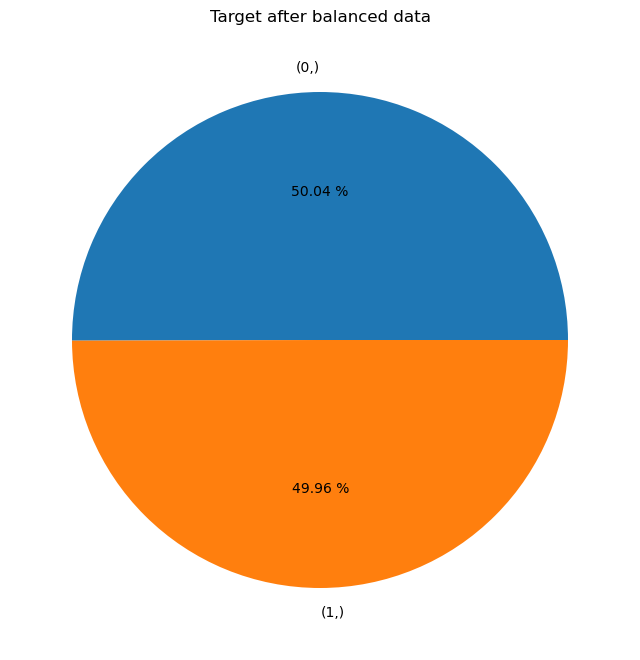

In [52]:
#Now we check whether the data is balanced or not
t=pd.DataFrame(y_train)
job_counts = t.value_counts()
job_counts.plot(kind='pie', title='Target after balanced data',autopct='%.2f %%', figsize=(8,10))
plt.show()

Great, the data is balanced, the number of target data is almost equal

Feature Scaling

Now we will use the scaling feature to make the data the same size to improve the result of the prediction model

In [54]:
from sklearn.preprocessing import scale
X_train=scale(x_train)
X_test=scale(x_test)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Assuming X_res and y_res are already defined and preprocessed datasets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "K-Neighbors": KNeighborsClassifier(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=["Classifier", "Accuracy"])

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)  # Use x_train and y_train here
    y_pred = clf.predict(x_test)  # Use x_test here
    accuracy = accuracy_score(y_test, y_pred)
    results = results.append({"Classifier": name, "Accuracy": accuracy}, ignore_index=True)

# Print the results
print(results)

C:\Users\PEFRIC (E.A) LTD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PEFRIC (E.A) LTD\AppData\Local\Temp\ipykernel_12284\1362153963.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Classifier": name, "Accuracy": accuracy}, ignore_index=True)
C:\Users\PEFRIC (E.A) LTD\AppData\Local\Temp\ipykernel_12284\1362153963.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

            Classifier  Accuracy
0  Logistic Regression  0.781407
1        Random Forest  0.968862
2                  SVC  0.723722
3          K-Neighbors  0.872210
4              Bagging  0.965353
5    Gradient Boosting  0.860151
6             AdaBoost  0.825684


C:\Users\PEFRIC (E.A) LTD\AppData\Local\Temp\ipykernel_12284\1362153963.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Classifier": name, "Accuracy": accuracy}, ignore_index=True)


Now we create a Prediction model using the Random Forest Classifier machine learning algorithm, First, what is a Random Forest algorithm A random forest is a supervised machine learning algorithm that can be used for classification and regression tasks. It is a type of ensemble learning method, which means that it combines the predictions of multiple individual models to produce a final prediction.

Random forest classifiers work by constructing a multitude of decision trees during training. Each decision tree is trained on a different random subset of the training data, and a random subset of features is considered at each split. This helps to reduce overfitting and improve the generalization performance of the model.

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
#predict x_test values
pred=rfc.predict(x_test)
#print accuracy for algorithm
print("Accuracy for Random Forest Classifier data: ",rfc.score(x_test,y_test))

Accuracy for Random Forest Classifier data:  0.9694024478041756


Model Evaluation Metrics
Loss L2 Function

L1 loss, also known as absolute error loss or mean absolute error (MAE), is a loss function that measures the average absolute difference between the predicted values and the true values. It is calculated as follows:

L1 loss = (1/n) * sum(|pred - y_test|)

In [63]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def l2_loss(y_test, pred):
  #Computes the L2 loss between y_test and y_pred."""
  return np.mean((y_test - pred)**2)

clf = RandomForestClassifier(criterion='mse')

print("loss L2 Function:",l2_loss(y_test, pred))

loss L2 Function: 0.030597552195824333


Classification Report

A classification report is a performance evaluation metric in machine learning that is used to assess the performance of a classification model. It provides a summary of various metrics that describe the model's performance, such as precision, recall, F1-score, and support.

Precision is the proportion of positive predictions that are actually correct. It is calculated as follows: Precision = TP / (TP + FP) where:

TP is the number of true positives
FP is the number of false positives
Recall is the proportion of actual positive cases that are correctly identified. It is calculated as follows:

Recall = TP / (TP + FN) where:

FN is the number of false negatives
F1-score is a harmonic mean of precision and recall. It is calculated as follows:

F1-score = 2 (Precision Recall) / (Precision + Recall)

Support is the total number of samples in a class.



In [64]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5537
           1       0.94      1.00      0.97      5575

    accuracy                           0.97     11112
   macro avg       0.97      0.97      0.97     11112
weighted avg       0.97      0.97      0.97     11112



Confusion Matrix

A confusion matrix is a table that summarizes the performance of a machine-learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The confusion matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data

Length of y_test: 11112
Length of y_pred: 11112


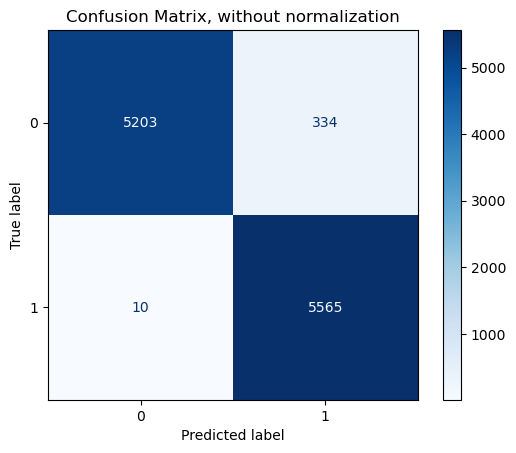

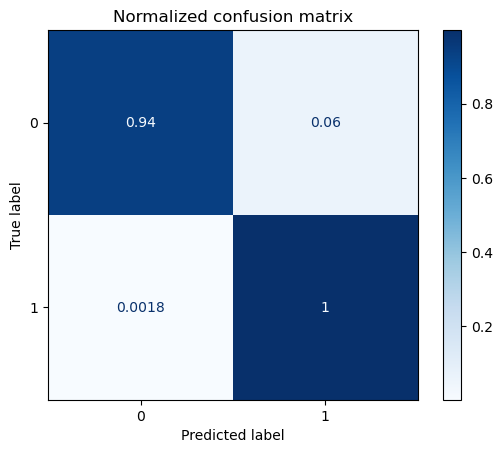

In [66]:
# Assuming X_res and y_res are your dataset
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the classifier
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(x_train, y_train)

# Make predictions
y_pred = rfc.predict(x_test)

# Check the shapes of y_test and y_pred
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Create a list of titles for normalized confusion matrices
titles_options = [("Confusion Matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# Create a ConfusionMatrixDisplay object
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rfc,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

# Show the plot
plt.show()

ROC Curve and AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate

False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

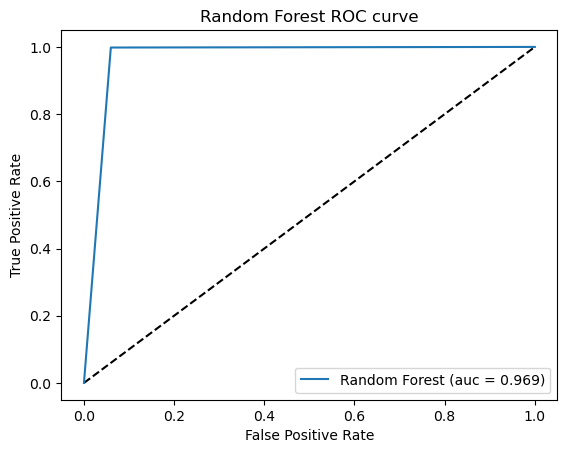

In [67]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_rfc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest (auc = %0.3f)'% auc_rfc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()


In [69]:
#Test the model in test.csv file
dft=pd.read_csv("test data.csv")


In [70]:
dft.copy()
month_map = {
      "jan": "01",
      "feb": "02",
      "mar": "03",
      "apr": "04",
      "may": "05",
      "jun": "06",
      "jul": "07",
      "aug": "08",
      "sep": "09",
      "oct": "10",
      "nov": "11",
      "dec": "12"}

# Replace month names in the dfFrame with month numbers
dft["month"]=dft["month"].replace(month_map)

In [71]:
datat=dft.copy()
datat=datat.drop(["daySinceLastCampaign","lastCampaignResult","target","id","contactId"], axis=1)

In [72]:
datat=datat.copy()
catt=datat.select_dtypes(include=["object"])
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
Catt=enc.fit_transform(catt)
catt=pd.DataFrame(Catt,columns=catt.columns)
num=datat.select_dtypes(exclude=["object"])
datat=pd.concat([num,catt], axis="columns")
datat.fillna(datat.mean(),inplace=True)

In [73]:
# Taking the probabilities of the test data
test_rfc = rfc.predict_proba(datat)
test_predict = test_rfc[:,1]
# Stammnummer of the test samples
ids_ = dft['id'].values

# creating a dataframe, saving the information inside it and save it into a csv file
test_Expected = pd.DataFrame(columns=['ID', 'Expected'])
test_Expected['ID'] = ids_
test_Expected['Expected'] =test_predict
test_Expected

C:\Users\PEFRIC (E.A) LTD\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,ID,Expected
0,432176974,0.58
1,432157692,0.04
2,432170850,0.26
3,432151613,0.05
4,432167744,0.32
...,...,...
13726,432162117,0.01
13727,432173177,0.02
13728,432159672,0.01
13729,432147170,0.02
